#CSCI 8523 Fall 2022 - Phase I Modeling
#### Maitrayee Deka, Josh Spitzer-Resnick

---



---



In [ ]:
# Installing required libraries
# !pip install tensorflow
# !pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
modis_bins_5 = pd.read_csv('/content/drive/Shareddrives/CSCI 8523 F22/Data/modis_bins_5.csv')

In [16]:
modis_bins_5

,year,yield_corn,yield_soybean,yield_wheat,49_0,49_1,49_2,49_3,49_4,65_0,...,241_0,241_1,241_2,241_3,241_4,257_0,257_1,257_2,257_3,257_4
0,2000,8.591008,2.561342,2.823927,3721.0,50755.0,8987.0,649.0,1.0,2936.0,...,380.0,8343.0,14887.0,36215.0,4670.0,638.0,13993.0,30788.0,18661.0,415.0
1,2001,8.673266,2.663958,2.701927,6734.0,26499.0,4038.0,505.0,1.0,7338.0,...,483.0,7360.0,13464.0,33863.0,9325.0,600.0,9861.0,24999.0,28843.0,192.0
2,2002,8.118010,2.556752,2.356827,11084.0,45156.0,6888.0,543.0,5.0,14058.0,...,340.0,5794.0,14753.0,35061.0,8547.0,383.0,7576.0,28344.0,27799.0,393.0
3,2003,8.924730,2.276952,2.971268,23726.0,25381.0,6195.0,742.0,4.0,12201.0,...,518.0,8461.0,15339.0,37214.0,2963.0,571.0,10172.0,30737.0,22272.0,743.0
4,2004,10.063628,2.840494,2.902680,10677.0,31355.0,3923.0,694.0,4.0,6266.0,...,408.0,4501.0,13096.0,32124.0,14366.0,261.0,7232.0,25127.0,31447.0,428.0
5,2005,9.285273,2.896130,2.823190,14290.0,36967.0,7268.0,951.0,26.0,11049.0,...,437.0,4904.0,12800.0,40002.0,6352.0,463.0,8290.0,34764.0,20884.0,94.0
6,2006,9.357833,2.881782,2.598712,12382.0,38977.0,6303.0,330.0,0.0,7327.0,...,355.0,6523.0,12313.0,34096.0,11208.0,328.0,8673.0,24508.0,30668.0,318.0
7,2007,9.458417,2.806695,2.704637,16703.0,23991.0,5082.0,211.0,1.0,7773.0,...,445.0,5811.0,14983.0,37890.0,5366.0,678.0,9561.0,33176.0,21035.0,45.0
8,2008,9.621053,2.671862,3.014640,17349.0,23518.0,6655.0,424.0,4.0,13611.0,...,406.0,4997.0,11479.0,33755.0,13858.0,597.0,5954.0,19328.0,37610.0,1006.0
9,2009,10.318039,2.959524,2.980516,12880.0,37660.0,3985.0,584.0,2.0,6228.0,...,401.0,4613.0,10750.0,28890.0,19841.0,414.0,6262.0,21122.0,36048.0,649.0


In [17]:
all_years = list(modis_bins_5['year'].values)

In [18]:
modis_day_cols = list(modis_bins_5.columns)[4:]

In [19]:
len(modis_day_cols)

70

## **ANN - Corn Average MODIS**

In [20]:
predictions_corn = []
for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_5.loc[modis_bins_5['year'] == year]
  remaining_df = modis_bins_5.loc[(modis_bins_5.year != year)]
  
  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_corn']
  Predictors = modis_day_cols +  ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Standardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=71, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 500, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_corn.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 46ms/step
YEAR  2001
1/1 [==============================] - 0s 48ms/step
YEAR  2002
1/1 [==============================] - 0s 48ms/step
YEAR  2003


1/1 [==============================] - 0s 53ms/step
YEAR  2004


1/1 [==============================] - 0s 65ms/step
YEAR  2005
1/1 [==============================] - 0s 47ms/step
YEAR  2006
1/1 [==============================] - 0s 58ms/step
YEAR  2007
1/1 [==============================] - 0s 62ms/step
YEAR  2008
1/1 [==============================] - 0s 61ms/step
YEAR  2009
1/1 [==============================] - 0s 47ms/step
YEAR  2010
1/1 [==============================] - 0s 73ms/step
YEAR  2011
1/1 [==============================] - 0s 59ms/step
YEAR  2012
1/1 [==============================] - 0s 54ms/step
YEAR  2013
1/1 [==============================] - 0s 47ms/step
YEAR  2014
1/1 [==============================] - 0s 49ms/step
YEAR  2015
1/1 [==============================] - 0s 55ms/step
YEAR  2016
1/1 [==============================] - 0s 47ms/step
YEAR  2017
1/1 [==============================] - 0s 46ms/step
YEAR  2018
1/1 [==============================] - 0s 48ms/step
YEAR  2019
1/1 [==============================] - 0s 53ms/step
YEA

In [21]:
predictions_corn

[8.248692,
 8.879825,
 8.7734585,
 8.535863,
 9.684647,
 9.350668,
 8.67944,
 8.195437,
 9.441973,
 10.429779,
 10.150268,
 9.863354,
 8.428765,
 8.647368,
 10.862339,
 10.050278,
 10.354398,
 10.737466,
 10.220752,
 10.512425,
 10.898886,
 11.177859,
 10.222769]

In [22]:
bin_5_ndvi_predicted_corn = modis_bins_5.copy()

In [23]:
bin_5_ndvi_predicted_corn = bin_5_ndvi_predicted_corn[['year', 'yield_corn']]

In [25]:
bin_5_ndvi_predicted_corn['yield_corn_predicted'] = predictions_corn

In [26]:
bin_5_ndvi_predicted_corn

,year,yield_corn,yield_corn_predicted
0,2000,8.591008,8.248692
1,2001,8.673266,8.879825
2,2002,8.118010,8.773458
3,2003,8.924730,8.535863
4,2004,10.063628,9.684647
5,2005,9.285273,9.350668
6,2006,9.357833,8.679440
7,2007,9.458417,8.195437
8,2008,9.621053,9.441973
9,2009,10.318039,10.429779


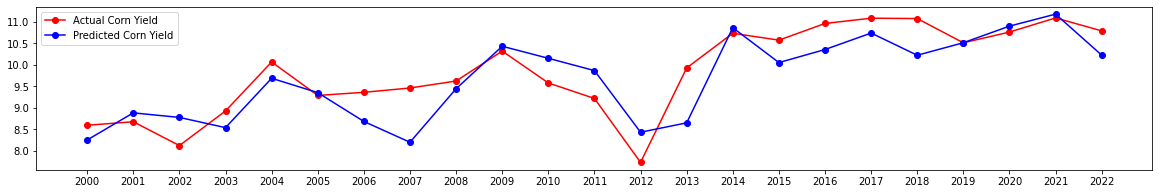

In [27]:
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(bin_5_ndvi_predicted_corn['year'], bin_5_ndvi_predicted_corn['yield_corn'], color='red', marker='o', label='Actual Corn Yield')
plt.plot(bin_5_ndvi_predicted_corn['year'], bin_5_ndvi_predicted_corn['yield_corn_predicted'], color='blue', marker='o', label = 'Predicted Corn Yield')

plt.legend()
plt.xticks(np.arange(min(bin_5_ndvi_predicted_corn['year']), max(bin_5_ndvi_predicted_corn['year'])+1, 1.0))
plt.show()

## **ANN - SB Average MODIS**

In [28]:
predictions_sb = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_5.loc[modis_bins_5['year'] == year]
  remaining_df = modis_bins_5.loc[(modis_bins_5.year != year)]
  

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_soybean']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()

  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)
  
  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=71, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 5, epochs = 400, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_sb.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 47ms/step
YEAR  2001
1/1 [==============================] - 0s 45ms/step
YEAR  2002
1/1 [==============================] - 0s 70ms/step
YEAR  2003
1/1 [==============================] - 0s 61ms/step
YEAR  2004
1/1 [==============================] - 0s 48ms/step
YEAR  2005
1/1 [==============================] - 0s 66ms/step
YEAR  2006
1/1 [==============================] - 0s 58ms/step
YEAR  2007
1/1 [==============================] - 0s 57ms/step
YEAR  2008
1/1 [==============================] - 0s 48ms/step
YEAR  2009
1/1 [==============================] - 0s 47ms/step
YEAR  2010
1/1 [==============================] - 0s 48ms/step
YEAR  2011
1/1 [==============================] - 0s 55ms/step
YEAR  2012
1/1 [==============================] - 0s 71ms/step
YEAR  2013
1/1 [==============================] - 0s 53ms/step
YEAR  2014
1/1 [==============================] - 0s 56ms/step
YEAR  2015
1/1 [==============================] - 0s 57

In [29]:
bin_5_ndvi_predicted_sb = modis_bins_5.copy()
bin_5_ndvi_predicted_sb = bin_5_ndvi_predicted_sb[['year', 'yield_soybean']]
bin_5_ndvi_predicted_sb['yield_soybean_predicted'] = predictions_sb

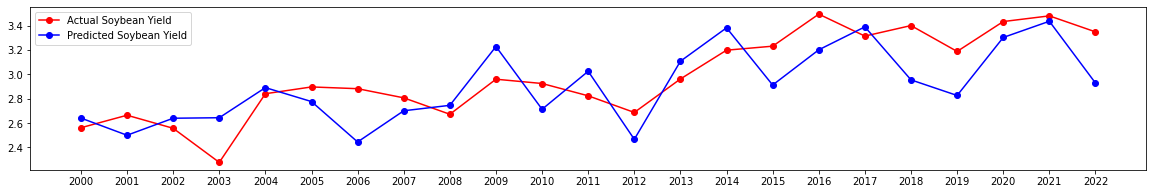

In [30]:
plt.plot(bin_5_ndvi_predicted_sb['year'], bin_5_ndvi_predicted_sb['yield_soybean'], color='red', marker='o', label='Actual Soybean Yield')
plt.plot(bin_5_ndvi_predicted_sb['year'], bin_5_ndvi_predicted_sb['yield_soybean_predicted'], color='blue', marker='o', label = 'Predicted Soybean Yield')

plt.legend()
plt.xticks(np.arange(min(bin_5_ndvi_predicted_sb['year']), max(bin_5_ndvi_predicted_sb['year'])+1, 1.0))
plt.show()

## **ANN - Wheat Average MODIS**

In [31]:
predictions_wheat = []

for year in all_years:
  print("YEAR ", year )
  test_df = modis_bins_5.loc[modis_bins_5['year'] == year]
  remaining_df = modis_bins_5.loc[(modis_bins_5.year != year)]

  # Separate Target Variable and Predictor Variables
  TargetVariable=['yield_wheat']
  Predictors = modis_day_cols + ['year']
  
  y_train = remaining_df[TargetVariable].values
  X_train = remaining_df[Predictors].values

  y_test = test_df[TargetVariable].values
  X_test = test_df[Predictors].values
  
  ### Sandardization of data ###
  PredictorScaler_train = StandardScaler()
  TargetVarScaler_train = StandardScaler()
  
  # Storing the fit object for later reference
  PredictorScalerFit_train = PredictorScaler_train.fit(X_train)
  TargetVarScalerFit_train = TargetVarScaler_train.fit(y_train)

  # Generating the standardized values of X and y
  X_train = PredictorScalerFit_train.transform(X_train)
  y_train = TargetVarScalerFit_train.transform(y_train)

  X_test = PredictorScalerFit_train.transform(X_test)
  y_test = TargetVarScalerFit_train.transform(y_test)
  
  # create ANN model
  model = Sequential()
  
  # Defining the Input layer and FIRST hidden layer, both are same!
  model.add(Dense(units=5, input_dim=71, kernel_initializer='normal', activation='relu'))
  
  # Defining the Second layer of the model
  # after the first layer we don't have to specify input_dim as keras configure it automatically
  model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
  
  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))
  
  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = 10, epochs = 400, verbose=0)

  # Generating Predictions on testing data
  Predictions=model.predict(X_test)
  
  # Scaling the predicted Price data back to original price scale
  Predictions=TargetVarScalerFit_train.inverse_transform(Predictions)
  
  predictions_wheat.append(Predictions[0][0])

YEAR  2000
1/1 [==============================] - 0s 62ms/step
YEAR  2001
1/1 [==============================] - 0s 48ms/step
YEAR  2002
1/1 [==============================] - 0s 49ms/step
YEAR  2003
1/1 [==============================] - 0s 66ms/step
YEAR  2004
1/1 [==============================] - 0s 54ms/step
YEAR  2005
1/1 [==============================] - 0s 73ms/step
YEAR  2006
1/1 [==============================] - 0s 63ms/step
YEAR  2007
1/1 [==============================] - 0s 50ms/step
YEAR  2008
1/1 [==============================] - 0s 47ms/step
YEAR  2009
1/1 [==============================] - 0s 64ms/step
YEAR  2010
1/1 [==============================] - 0s 50ms/step
YEAR  2011
1/1 [==============================] - 0s 58ms/step
YEAR  2012
1/1 [==============================] - 0s 242ms/step
YEAR  2013
1/1 [==============================] - 0s 48ms/step
YEAR  2014
1/1 [==============================] - 0s 48ms/step
YEAR  2015
1/1 [==============================] - 0s 4

In [33]:
bin_5_ndvi_predicted_wheat = modis_bins_5.copy()
bin_5_ndvi_predicted_wheat = bin_5_ndvi_predicted_wheat[['year', 'yield_wheat']]
bin_5_ndvi_predicted_wheat['yield_wheat_predicted'] = predictions_wheat

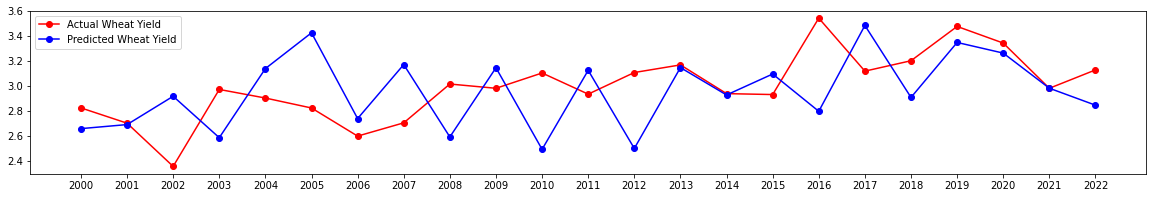

In [34]:
plt.plot(bin_5_ndvi_predicted_wheat['year'], bin_5_ndvi_predicted_wheat['yield_wheat'], color='red', marker='o', label='Actual Wheat Yield')
plt.plot(bin_5_ndvi_predicted_wheat['year'], bin_5_ndvi_predicted_wheat['yield_wheat_predicted'], color='blue', marker='o', label = 'Predicted Wheat Yield')

plt.legend()
plt.xticks(np.arange(min(bin_5_ndvi_predicted_wheat['year']), max(bin_5_ndvi_predicted_wheat['year'])+1, 1.0))
plt.show()